# Hands-on clustering exercise on Credit Card Data

## The goal of this excercise is to complete the hands-on experience task with similar task description as the project has.

**Dataset**

Dataset downloaded for download is here https://www.kaggle.com/arjunbhasin2013/ccdata

And also here: https://raw.githubusercontent.com/jplatos/Fundamentals-of-Machine-Learning/refs/heads/main/CCGENERAL.csv

**Context**

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**Content**

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user


# Goal of the exercises


1. Load the data from as shown in the link bellow.
2. Made the explorative analysis on the data.
3. Evaluate the missing values, scale of the data.
4. Apply k-means or aglomerative clustering and chose the propriate number of clusters.
5. Describe the clusters and their difference.





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
import scipy.spatial

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jplatos/Fundamentals-of-Machine-Learning/refs/heads/main/CCGENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.isna().sum().sort_values(ascending=False)

,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
BALANCE,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0


Je dobre, ze se nevyskytuje prilis NA hodnot u vetsiny atributu (pouze u minimum payments)

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


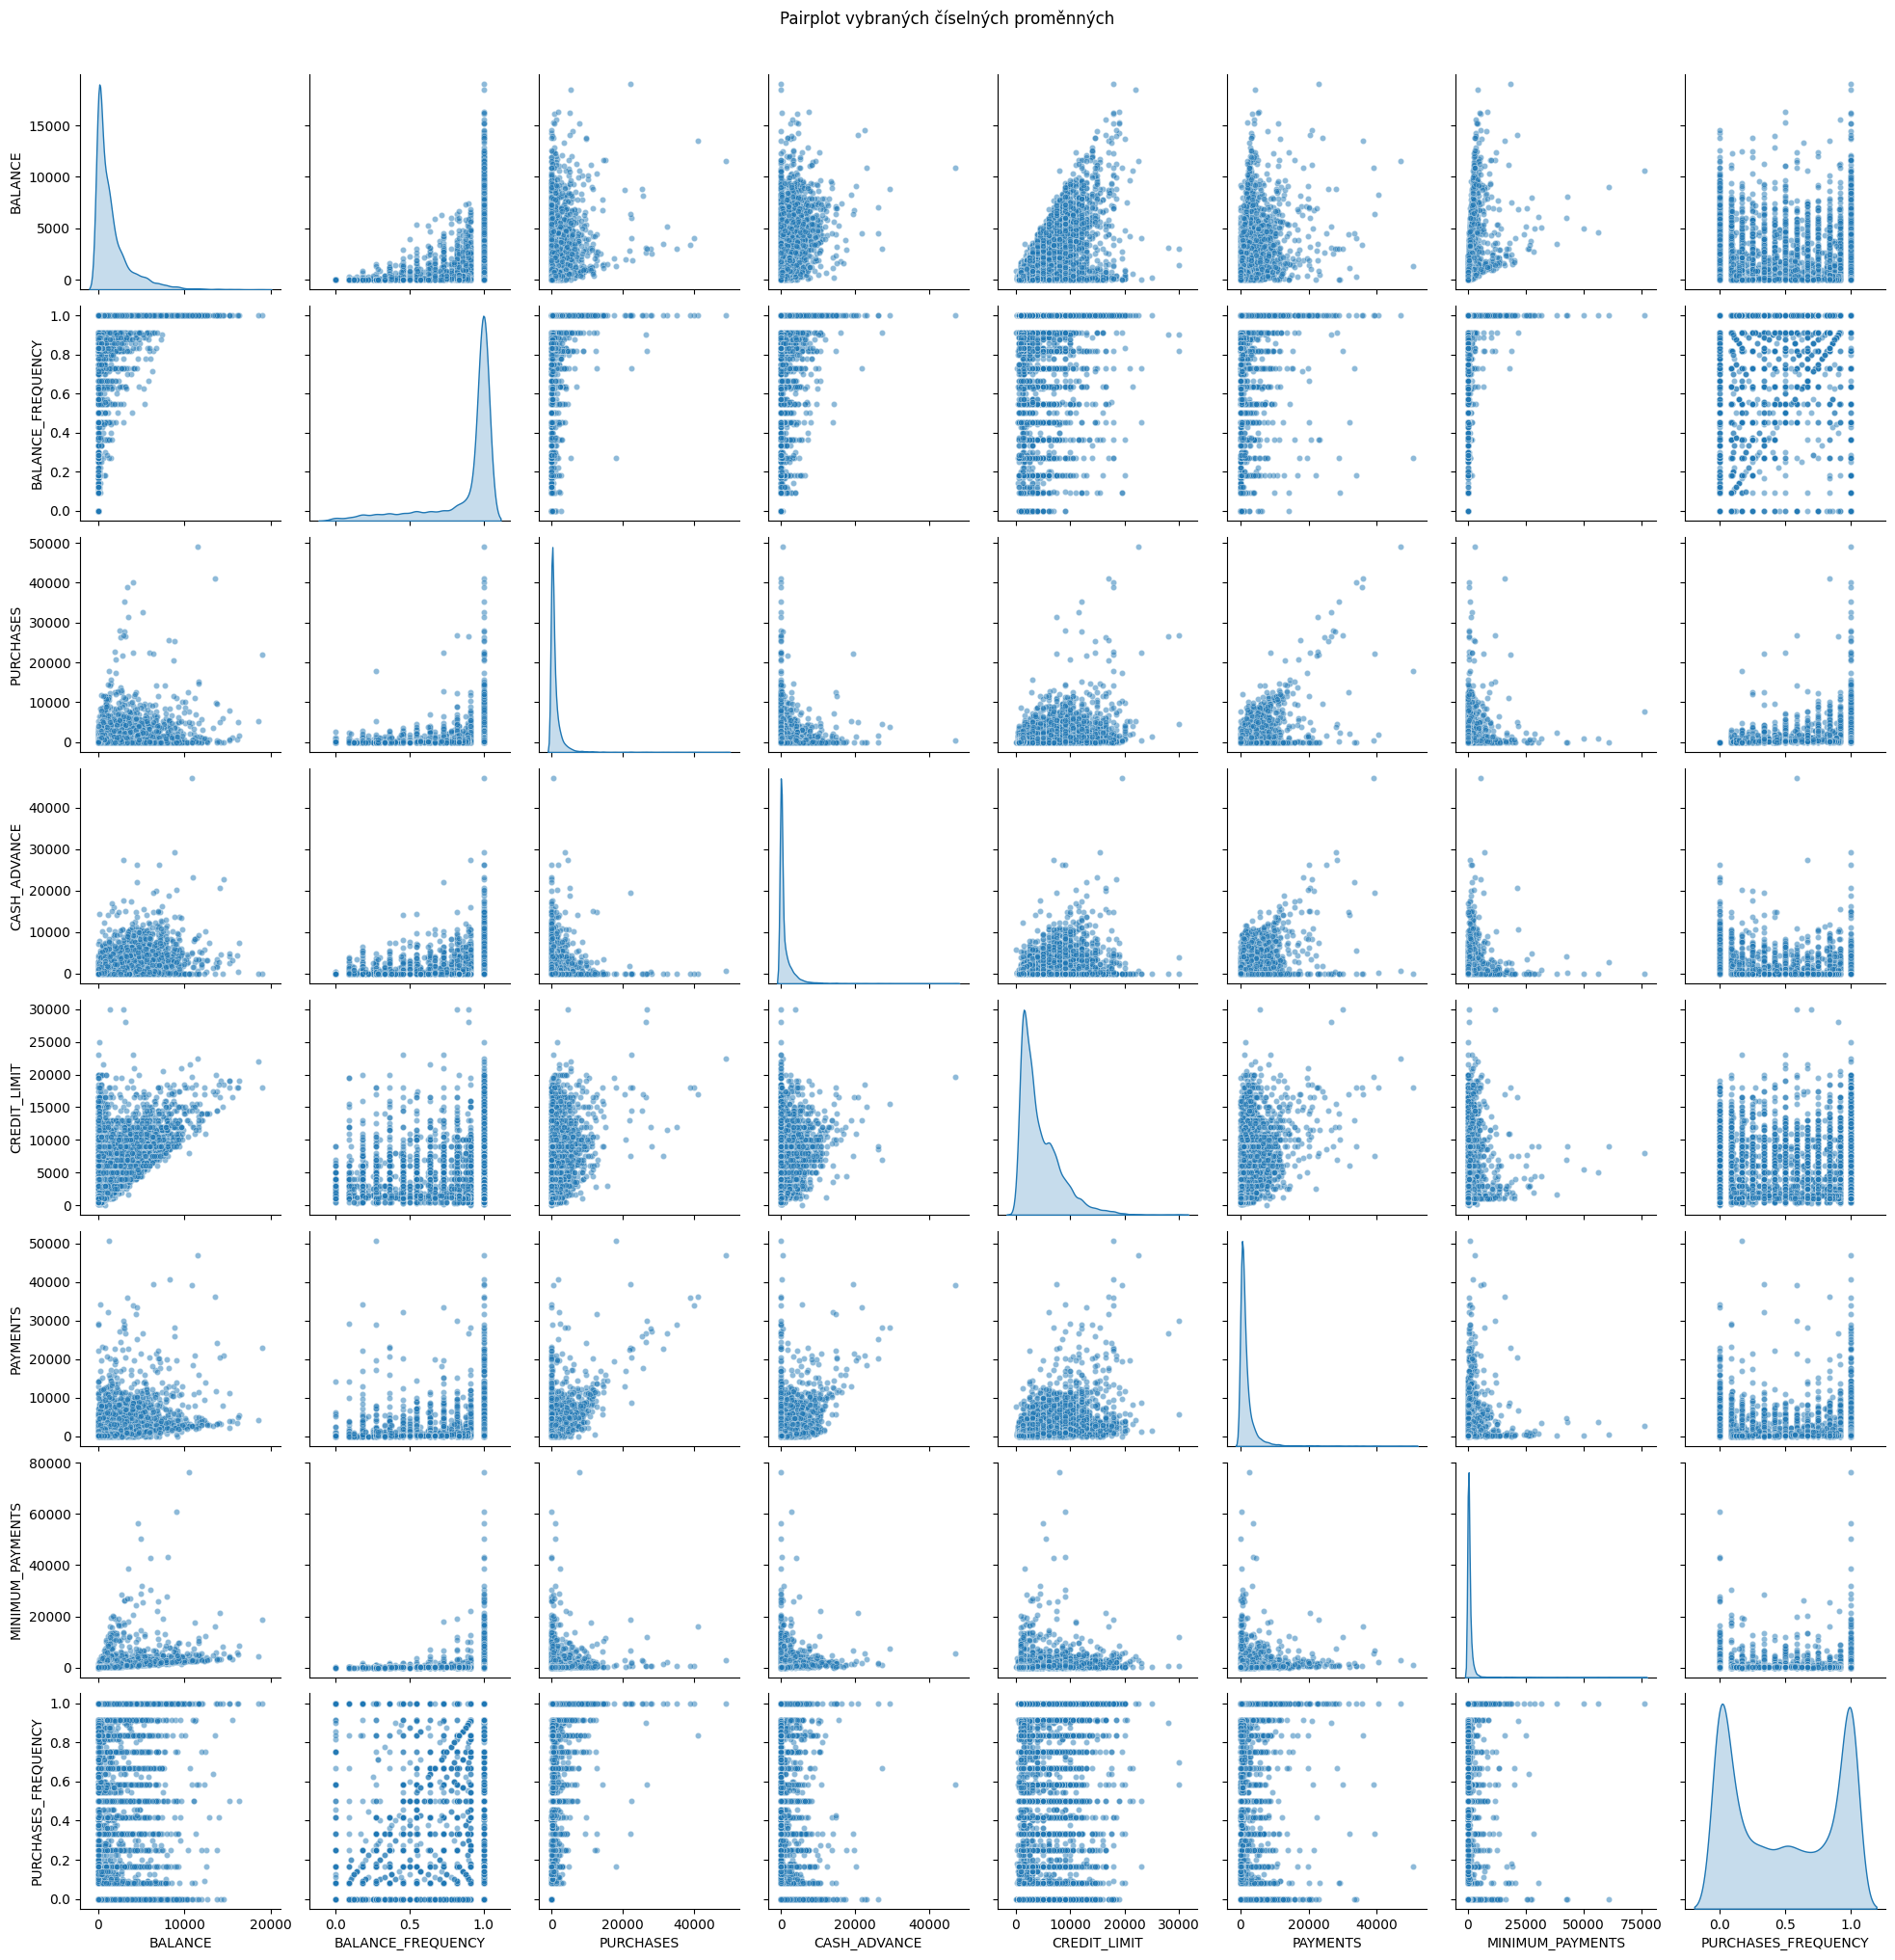

In [6]:
cols = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
    'PURCHASES_FREQUENCY'
]

sns.pairplot(df[cols], diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle('Pairplot vybraných číselných proměnných', y=1.02)
plt.show()

In [7]:
df['PURCHASES_FREQUENCY'].value_counts()


,count
PURCHASES_FREQUENCY,
1.000000,2178
0.000000,2043
0.083333,677
0.916667,396
0.500000,395
0.166667,392
0.833333,373
0.333333,367
0.250000,345


Dalo by se zaokrouhlit?? => kategoricka data

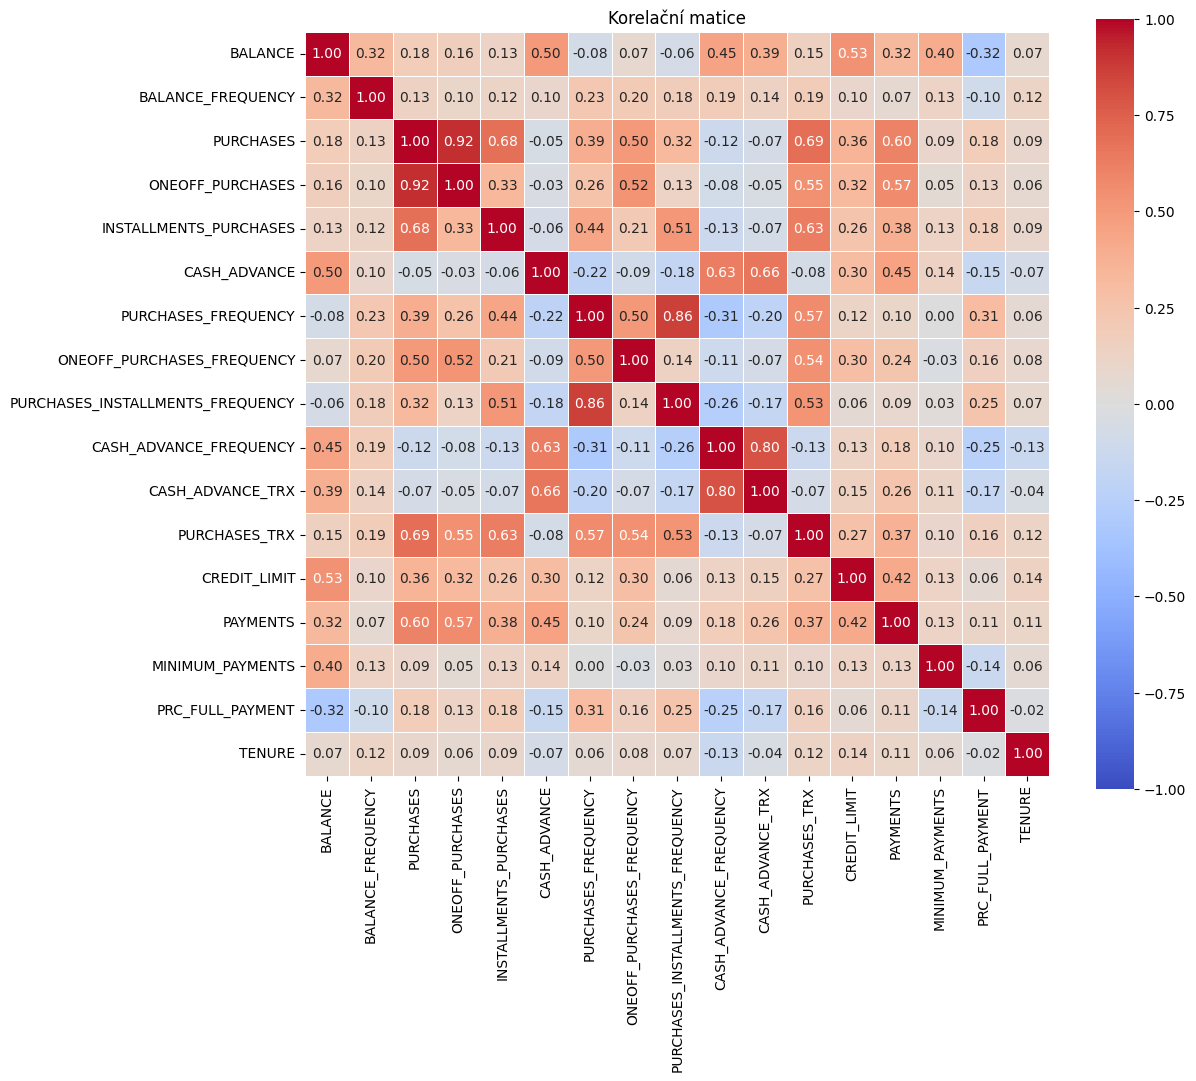

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5
)
plt.title('Korelační matice')
plt.show()


In [29]:
selected_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'TENURE']

df_clustering = df[selected_features].copy()
df_clustering
df_clustering = df_clustering.dropna()

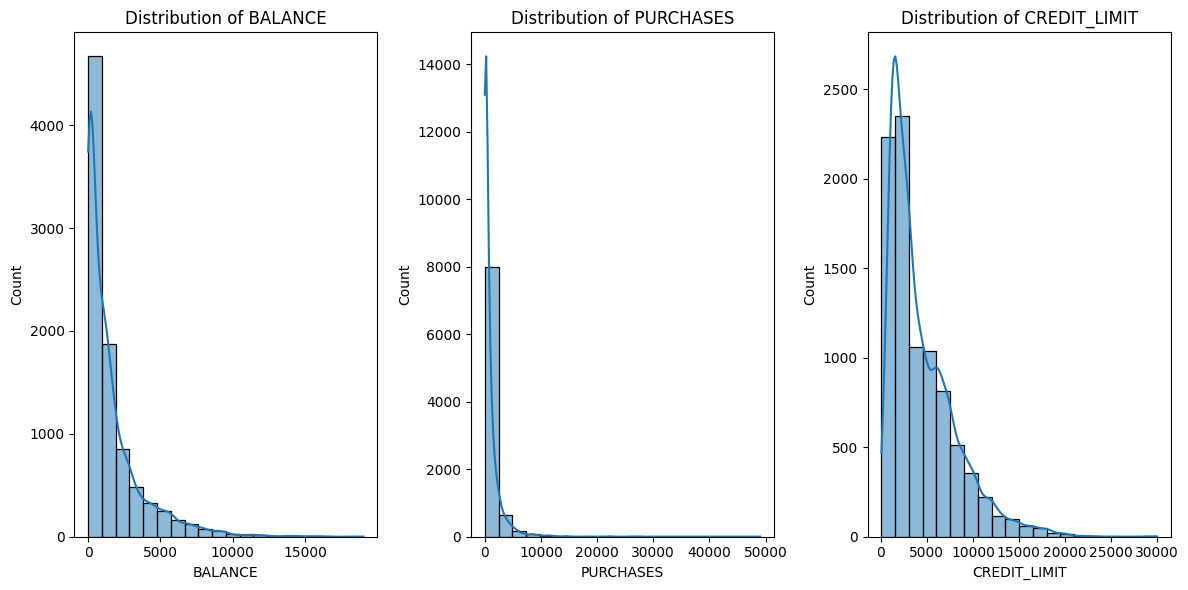

In [30]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_clustering[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Silny ocas doprava => heavy tailed distribution => Powertransform

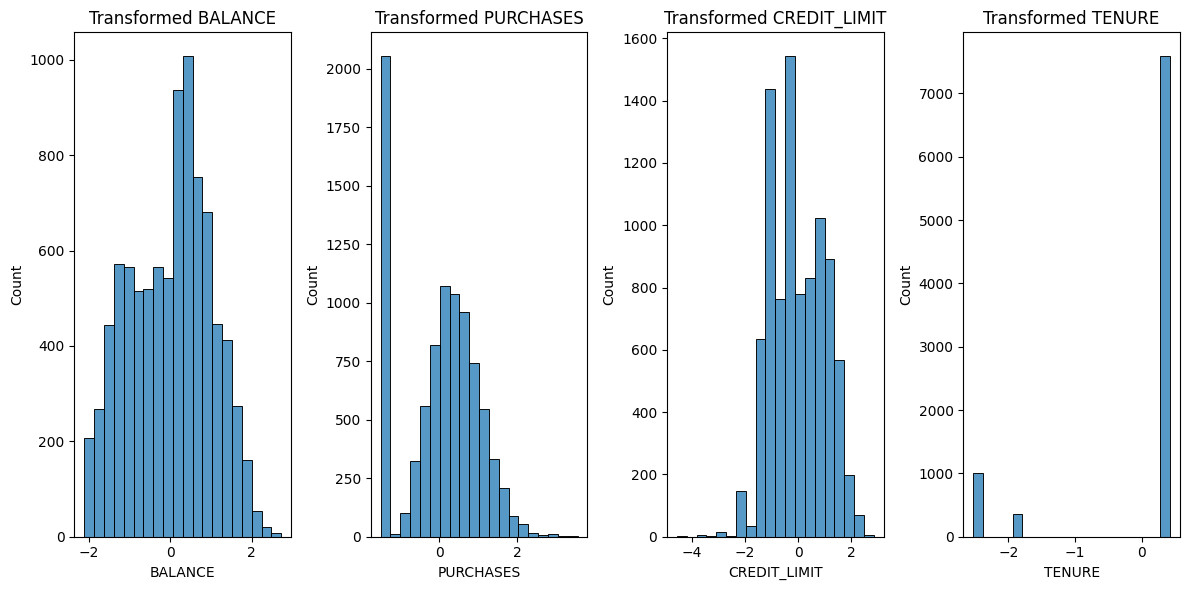

In [49]:
pt = PowerTransformer(method='yeo-johnson')

df_scaled = pd.DataFrame(
    pt.fit_transform(df_clustering),
    columns=df_clustering.columns,
    index=df_clustering.index
)

plt.figure(figsize=(12, 6))
for i, col in enumerate(['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'TENURE']):
    plt.subplot(1, 4, i+1)
    sns.histplot(df_scaled[col], bins=20)
    plt.title(f'Transformed {col}')
plt.tight_layout()
plt.show()

In [32]:
df_encoded = df_scaled.copy()
df_encoded.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,TENURE
0,-1.238338,-0.368311,-1.425281,-1.000587,0.383490,0.422108
1,1.051883,-1.505361,0.924151,-1.000587,-1.085536,0.422108
2,0.860506,0.521492,1.012124,1.065269,-1.085536,0.422108
3,0.570390,0.875720,1.012124,1.229487,-1.085536,0.422108
4,0.111719,-0.905055,-1.215649,-0.020124,-1.085536,0.422108


In [33]:
X = df_encoded.values
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')


<Axes: xlabel='k', ylabel='sse'>

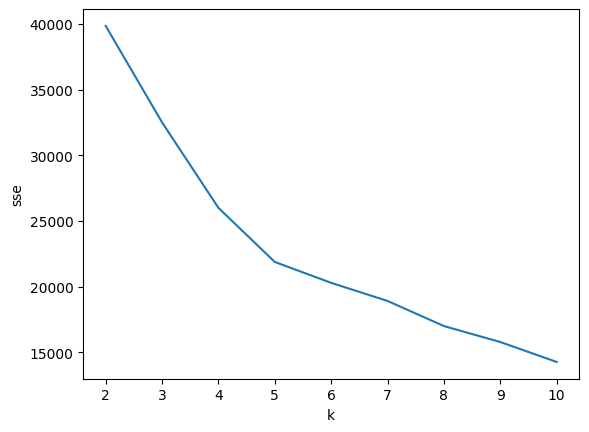

In [34]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

Tady vypada nejlepe 5

<Axes: xlabel='k', ylabel='silhouette'>

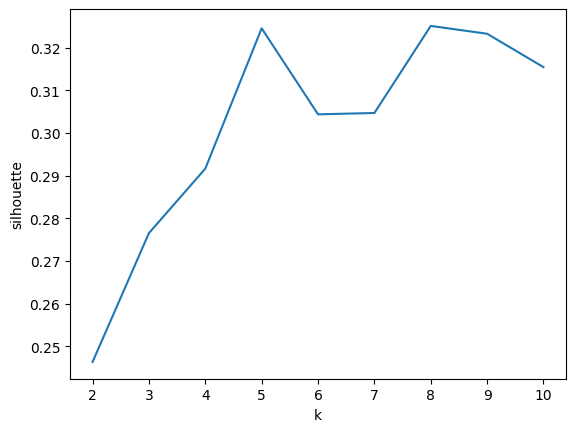

In [35]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

Zvolime 5

In [36]:
X = df_encoded.values

kmeans_5 = KMeans(n_clusters=5, random_state=13)
cluster_labels_5 = kmeans_5.fit_predict(X)

# přidání cluster labels do df_encoded
df_encoded['cluster'] = cluster_labels_5

df_encoded.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,TENURE,cluster
0,-1.238338,-0.368311,-1.425281,-1.000587,0.383490,0.422108,1
1,1.051883,-1.505361,0.924151,-1.000587,-1.085536,0.422108,4
2,0.860506,0.521492,1.012124,1.065269,-1.085536,0.422108,0
3,0.570390,0.875720,1.012124,1.229487,-1.085536,0.422108,0
4,0.111719,-0.905055,-1.215649,-0.020124,-1.085536,0.422108,4


In [37]:
cluster_counts = df_encoded['cluster'].value_counts()
cluster_counts

,count
cluster,
3,2256
1,2014
4,1729
0,1653
2,1297


<Axes: xlabel='cluster', ylabel='count'>

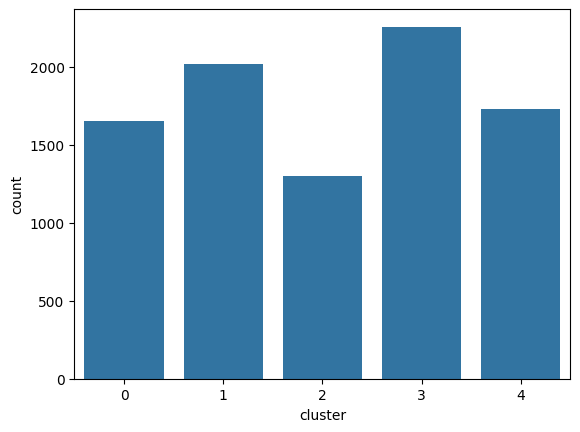

In [38]:
sns.countplot(data=df_encoded, x='cluster')

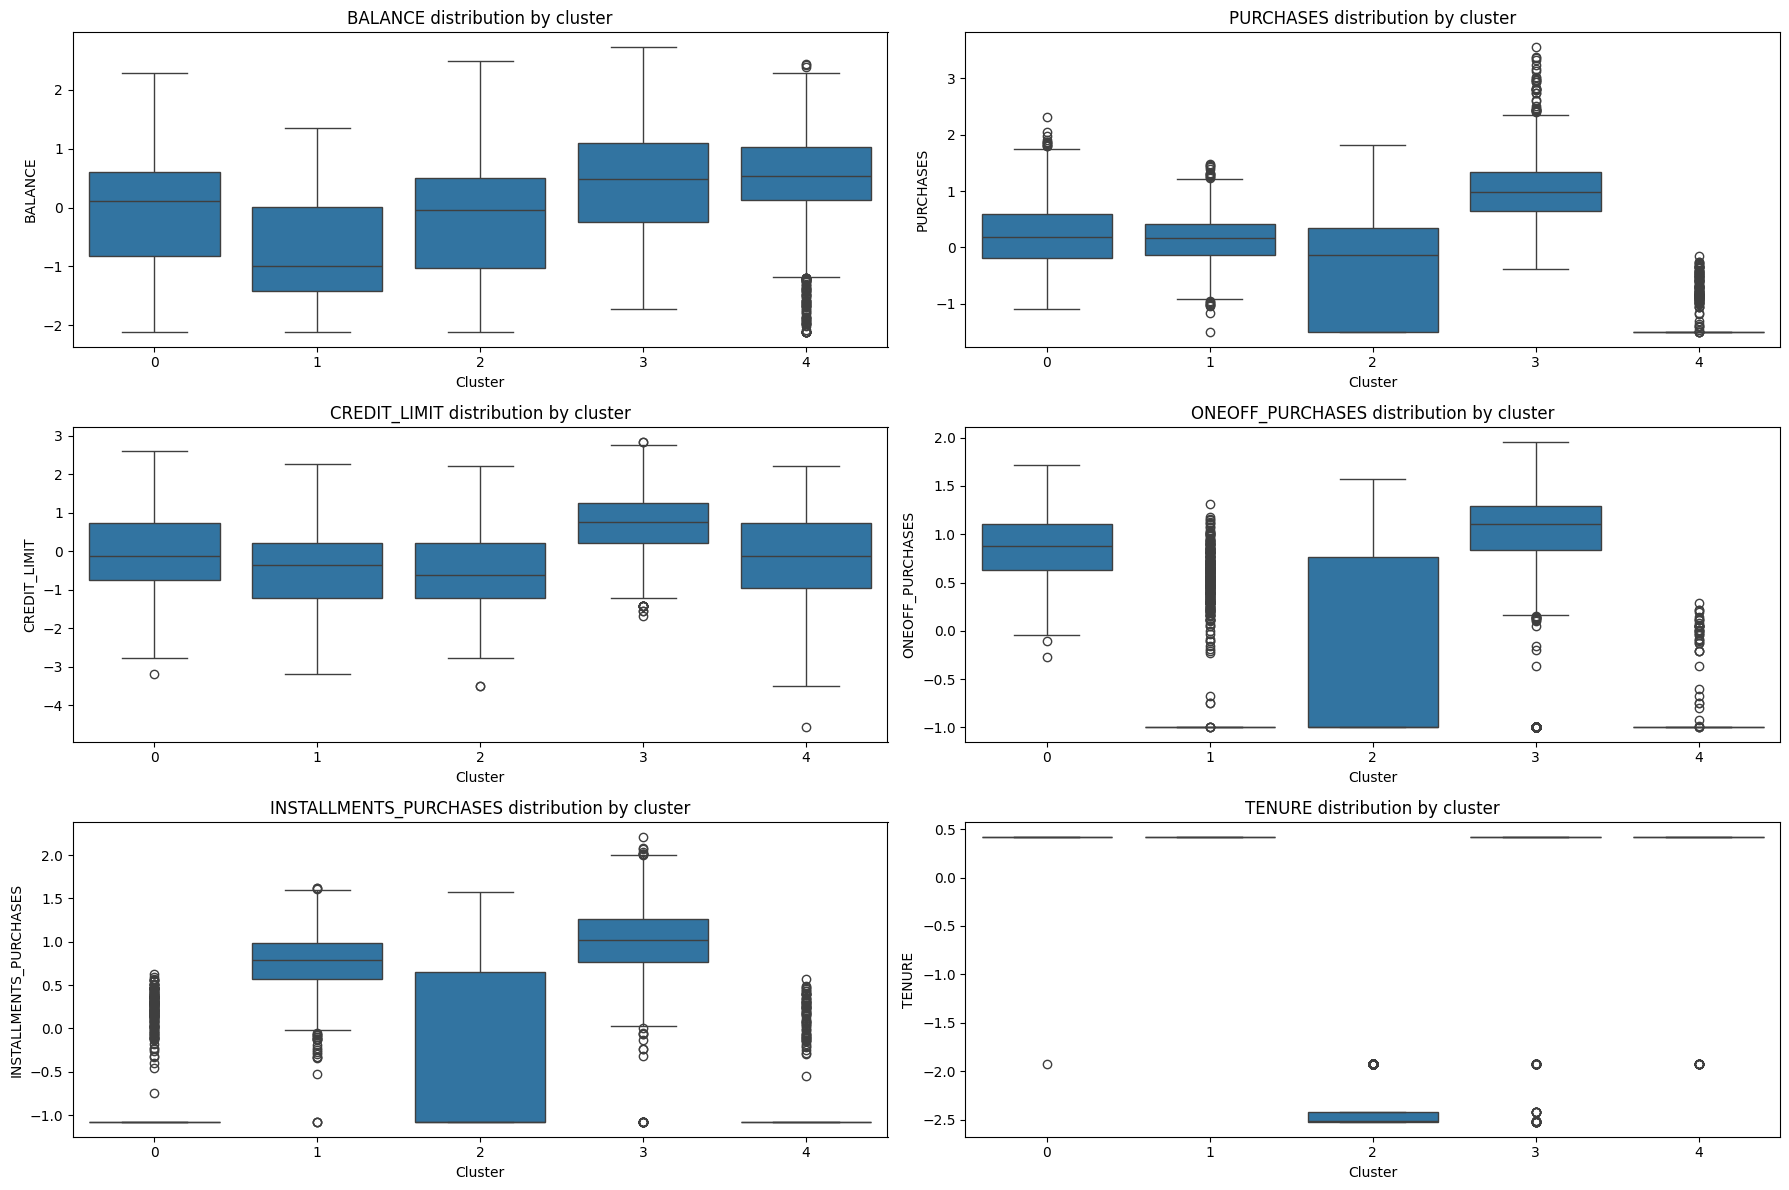

In [50]:
plt.figure(figsize=(18,12))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='cluster', y=col, data=df_encoded)
    plt.title(f'{col} distribution by cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


3 a 4 jsou jsou nejbohatsi clustery
  
  - 3 - kupuje na splatky dost i primo, vyssi limit (utracejici majetni)
  
  - 4 - nekupuje na splatky ani primo, nizsi limit nez 3. cluster (setrivi majetni)


1 - nejchudsi, na splatky kupuji hodne, primo nakupy delaji minimalne

0 - nezadluzeni, jinak nic vyrazneho

2 jsou novi, nezadluzeni, moc neutraci ani naprimo,

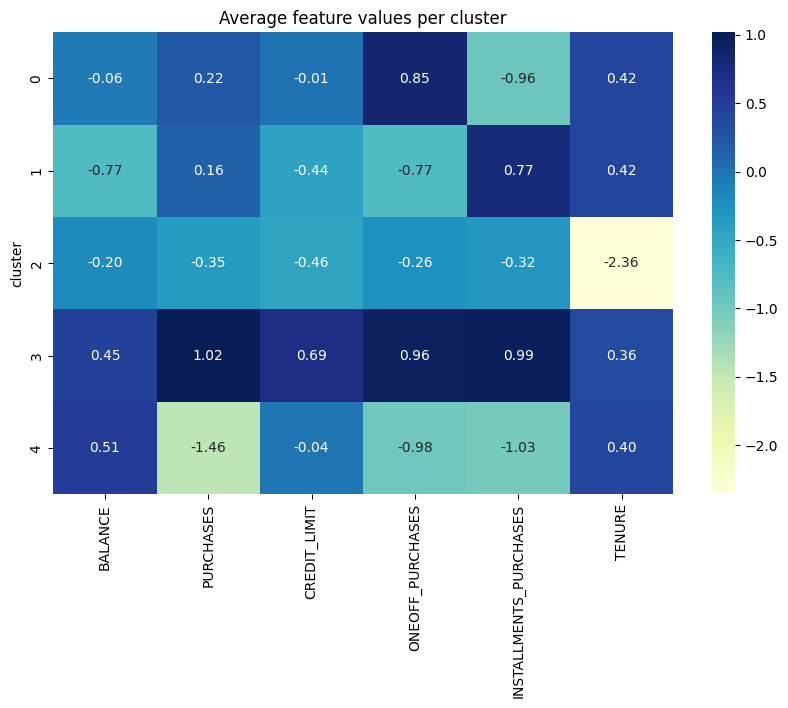

In [52]:
means = df_encoded.groupby('cluster')[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT',
                                       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'TENURE']].mean()

plt.figure(figsize=(10,6))
sns.heatmap(means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average feature values per cluster')
plt.show()